In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations as c
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import*
import plotly.graph_objects as go
import plotly
import dash
#import chart_studio.tools as tls
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
from flask import Flask, render_template
from datetime import datetime  
from datetime import timedelta  

In [34]:
df = pd.read_csv("Queue Summary Report_Table1.csv")

In [35]:
df.columns

Index(['DisplaycName', 'cName', 'cHKey3', 'cHKey4', 'dIntervalStart',
       'dIntervalStartUTC', 'cReportGroup', 'nEnteredAcd', 'nAnsweredAcd',
       'nAbandonedAcd', 'nFlowOutAcd', 'nHoldAcd', 'tHoldAcd', 'tTalkAcd',
       'tAcw', 'tAnsweredACD', 'nAnsweredACDSvcLvl', 'nAnsweredAcdSvcLvl1',
       'nAnsweredAcdSvcLvl2', 'nAnsweredAcdSvcLvl3', 'nAnsweredAcdSvcLvl4',
       'nAnsweredAcdSvcLvl5', 'nAnsweredAcdSvcLvl6', 'nAbandonAcdSvcLvl1',
       'nAbandonAcdSvcLvl2', 'nAbandonAcdSvcLvl3', 'nAbandonAcdSvcLvl4',
       'nAbandonAcdSvcLvl5', 'nAbandonAcdSvcLvl6', 'cServiceLevels',
       'Interval', 'IntervalSort', 'IntervalDateLoc', 'tHandle',
       'tTalkACDOnly', 'LocalizedMediaType'],
      dtype='object')

In [36]:
df['IntervalDateLoc'] = pd.to_datetime(df['IntervalDateLoc'])
df['IntervalDateLoc'] = df['IntervalDateLoc'].dt.date

In [37]:
df['IntervalDateLoc'].head()

0    2022-02-01
1    2022-02-01
2    2022-02-01
3    2022-02-01
4    2022-02-01
Name: IntervalDateLoc, dtype: object

In [38]:
df = df.groupby(by = "DisplaycName", as_index= True).sum()

In [39]:
df.head()

,nEnteredAcd,nAnsweredAcd,nAbandonedAcd,nFlowOutAcd,nHoldAcd,tHoldAcd,tTalkAcd,tAcw,tAnsweredACD,nAnsweredACDSvcLvl,...,nAnsweredAcdSvcLvl6,nAbandonAcdSvcLvl1,nAbandonAcdSvcLvl2,nAbandonAcdSvcLvl3,nAbandonAcdSvcLvl4,nAbandonAcdSvcLvl5,nAbandonAcdSvcLvl6,IntervalSort,tHandle,tTalkACDOnly
DisplaycName,,,,,,,,,,,,,,,,,,,,,
PH_Kinray_CustomerService_Z1_English,4815,4645,170,0,2258,662574,1887291,1730549,364145,3633,...,51,21,7,17,12,5,5,1490,3617840,1224717


In [41]:
df["acw"] = df["tAcw"] / df["nAnsweredAcd"]
df["aht"]= df["tHandle"] / df["nAnsweredAcd"]

In [42]:
df.columns

Index(['nEnteredAcd', 'nAnsweredAcd', 'nAbandonedAcd', 'nFlowOutAcd',
       'nHoldAcd', 'tHoldAcd', 'tTalkAcd', 'tAcw', 'tAnsweredACD',
       'nAnsweredACDSvcLvl', 'nAnsweredAcdSvcLvl1', 'nAnsweredAcdSvcLvl2',
       'nAnsweredAcdSvcLvl3', 'nAnsweredAcdSvcLvl4', 'nAnsweredAcdSvcLvl5',
       'nAnsweredAcdSvcLvl6', 'nAbandonAcdSvcLvl1', 'nAbandonAcdSvcLvl2',
       'nAbandonAcdSvcLvl3', 'nAbandonAcdSvcLvl4', 'nAbandonAcdSvcLvl5',
       'nAbandonAcdSvcLvl6', 'IntervalSort', 'tHandle', 'tTalkACDOnly', 'acw',
       'aht'],
      dtype='object')

In [43]:
que_sum = df[['nEnteredAcd','nAnsweredAcd', 'nAbandonedAcd', 'acw', 'aht']]

In [44]:
que_sum = que_sum.reset_index(level=0)

In [45]:
que_sum["acw_goal"] = 60
que_sum["aht_goal"] = 480
que_sum["abn_goal"] = (que_sum["nEnteredAcd"] * .05)

In [ ]:
app.layout = html.Div([
    html.H4('Analysis of the restaurant sales'),
    dcc.Graph(id="graph"),
    html.P("Names:"),
    dcc.Dropdown(id='names',
        options=['smoker', 'day', 'time', 'sex'],
        value='day', clearable=False
    ),
    html.P("Values:"),
    dcc.Dropdown(id='values',
        options=['total_bill', 'tip', 'size'],
        value='total_bill', clearable=False
    ),
])


@app.callback(
    Output("graph", "figure"), 
    Input("names", "value"), 
    Input("values", "value"))
def generate_chart(names, values):
    df = px.data.tips() # replace with your own data source
    fig = px.pie(df, values=values, names=names, hole=.3)
    return fig

In [ ]:
import plotly.express as px
df = px.data.tips()
fig = px.bar(df, x="sex", y="total_bill",
             color='smoker', barmode='group',
             height=400)

In [65]:
que_sum.columns

Index(['DisplaycName', 'nEnteredAcd', 'nAnsweredAcd', 'nAbandonedAcd', 'acw',
       'aht', 'acw_goal', 'aht_goal', 'abn_goal'],
      dtype='object')

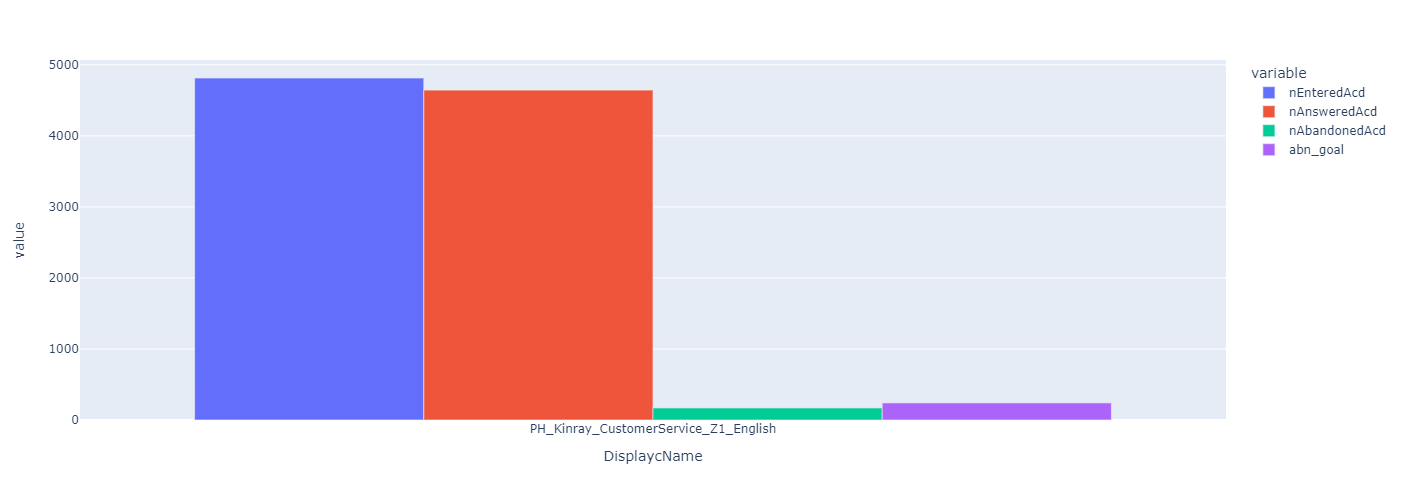

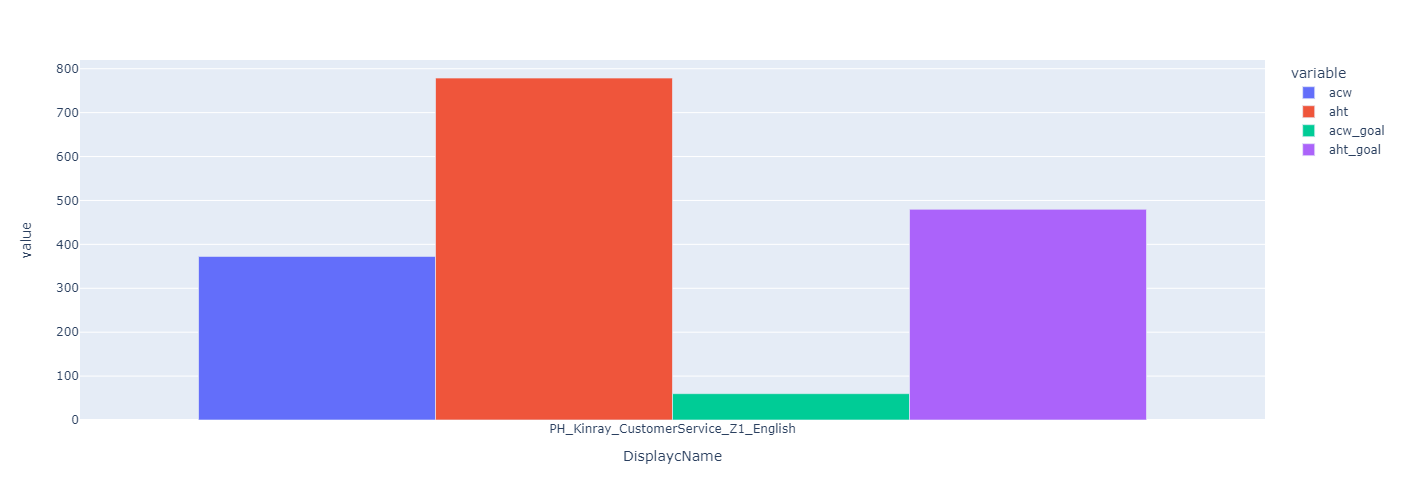

(None, None)

In [78]:
# Standard random staffing
wide_df = df.head()

fig1 = px.bar(que_sum, x= 'DisplaycName', y= ['nEnteredAcd', 'nAnsweredAcd', 'nAbandonedAcd', 'abn_goal'], barmode = 'group', width = 500, height = 500)
fig2 = px.bar(que_sum, x= 'DisplaycName', y= ['acw', 'aht', 'acw_goal', 'aht_goal'], barmode = 'group', width = 500, height = 500)

#plotly.offline.plot(fig, filename='normm_staff.html',auto_open=False)
fig1.show(), fig2.show()

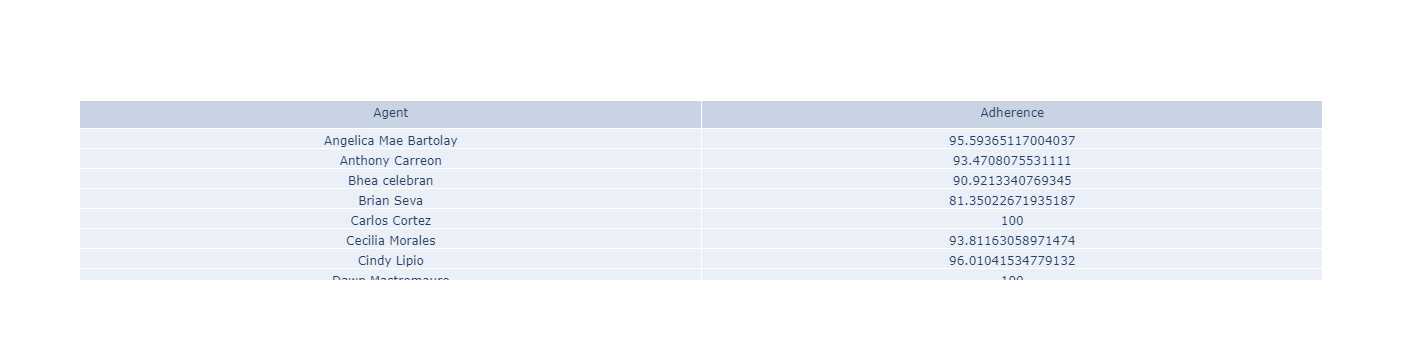

In [85]:
fig = go.Figure(data=[go.Table(header=dict(values=['Agent', 'Adherence']),
                 cells=dict(values=[coor1, coor2]))
                     ])

fig.show()

In [59]:
import dash
import dash_html_components as html
import dash_core_components as dcc

app = dash.Dash()
app.layout = html.Div([
    html.Div([
        html.Div([
            html.H3('Column 1'),
            dcc.Graph(id='g1', figure={'data': [{'y': [1, 2, 3]}]})
        ], className="six columns"),

        html.Div([
            html.H3('Column 2'),
            dcc.Graph(id='g2', figure={'data': [{'y': [1, 2, 3]}]})
        ], className="six columns"),
    ], className="row")
])

app.css.append_css({
    'external_url': 'https://codepen.io/chriddyp/pen/bWLwgP.css'
})

if __name__ == '__main__':
    app.run_server(debug=True)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


SystemExit: 1